# 데이터 전처리
 - 데이터 전처리 : 올바른 결과를  도출하기 위해 데이터를 사용하기 전 전처리 과정(정규화 등...) 이라고 한다.

In [1]:
# 1. 넘파이로 데이터 준비하기
import numpy as np

fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]
                

In [2]:
# 넘파이를 활용하여 stack 형태로 데이터 만듦
fish_data = np.column_stack((fish_length,fish_weight))

# 데이터 한번 출력해보기, 이러면 튜플형태로 저장
print(fish_data[:10])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]
 [ 29.7 450. ]
 [ 29.7 500. ]
 [ 30.  390. ]
 [ 30.  450. ]
 [ 30.7 500. ]]


In [3]:
print(fish_data.shape) # 총 49개의 데이터랑, 2개의 특성으로 나뉨

(49, 2)


In [4]:
# 타겟 데이터 생성(타겟데이터 : 일반 시험에서 정답지랑 똑같음)
# 앞에서는 타겟데이터를 [1]*35 +[0]*14 의 리스트 형태로 만듦
fish_target = np.concatenate((np.ones(35),np.zeros(14)))

print(fish_target) # 생성 제대로 됨

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [5]:
from sklearn.model_selection import train_test_split
# train_test_split -> 전달되는 리스트나 배열을 비율에 맞게 훈련세트와 테스트 세트로 나누어줌

# 앞서서는 np.random.seed()로 그냥 나눴는데  train_test_split() 얘는 그냥 기본 기능으로 랜덤 시드를 정할수가 있네?
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)
#데이터 확인
#1. 잘 섞였음?
print(train_input.shape,test_input.shape)
#2. 테스트 데이터 잘 섞임?
print(test_target)

(36, 2) (13, 2)
[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [7]:
#테스트 세트에서 봤을땐 데이터가 제대로 안섞임을 확인(편향된 데이터임을 확인)
# 이는 train_test_split() 에서 stratify 매개변수에 타겟데이터를 전달하면
# 클래스 비율(빙어, 도미의 비율)에 맞게 데이터를 나눈다.
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target,stratify=fish_target, random_state=42)

print(test_target)

# 이러면 train, test 세트의 비율이 실제 클래스의 종류 비율(빙어, 도미)과 어느정도 비슷해짐 (36 : 13) = 2.25:1

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [9]:
# 이제 학습할수 있게 넘어가보자!
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(train_input,train_target)
knn.score(test_input,test_target)


1.0

In [11]:
# 예상, 도미데이터 25,150을 넣었을때, targert 1(도미) 로 나와야 함
print(knn.predict([[25,150]]))

[0.]


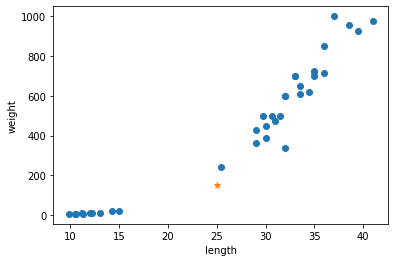

In [13]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='*')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
# 산점도 그래프를 확인해서 보았을땐, 내가 추가한 데이터(25,150)가 도미쪽에 가까워 보임

In [16]:
# 그러면 메쏘드를 활용해서 정확하게 확인해보자
# KNeighborsClassifier() 클래스는 주어진 샘플에서 가장 가까운 이웃을 찾아주는
# kneighbors() 메서드를 제공해 준다. 
# (distance, index 값 반환, n_neighbors의 기본 default 값이 5 이므로 이 메쏘드도 5개의 값 반환)

Text(0, 0.5, 'weight')

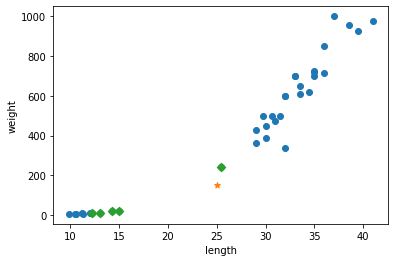

In [21]:
distances, indexes = knn.kneighbors([[25,150]])


plt.scatter(train_input[:,0],train_input[:,1]) 
plt.scatter(25,150,marker='*')
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='D')
plt.xlabel('length')
plt.ylabel('weight')
# 해당 산점도 그래프를 사용해서 확인해 보니, 값이 빙어에 더 가깞게 나타남을 알 수 있음

In [20]:
# 직접 주변의 데이터를 확인하여 결과를 찾아봄
# 결과 빙어에 더 가깝게(0) 데이터가 출력이 되었다는 것을
# 알 수 있음
print(train_input[indexes],"\n")

print(train_target[indexes])


[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]] 

[[1. 0. 0. 0. 0.]]


In [23]:
# kneighbors() 매서드 내의 반환값 중 하나인 distances를 확인해서 한번 보면
print(distances)
# 나머지 4개의 데이터가( 빙어 : 0) 더 먼것을 알 수 있음 
# 이를통해 x와 y의 범위가 제대로 표현되지 않아 
# 원하는 예상 결과가 아닌 다른 결과가 나옴을 알 수 있음 -> 원하는 값이 나올 수 있도록 정규화를 통해 값을 정리해야 한다.

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]
